In [1]:
# habilitate src folder to be imported from this notebook
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

___

In [2]:
import tensorflow as tf
import numpy as np
from pathlib import Path

from src.loaders.dataset import DataGenerator
from src.models.denseautoencoder import DenseAutoencoder

2022-08-26 11:01:29.959801: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 11:01:29.959827: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
class CNNAutoencoder(tf.keras.models.Model):

  def __init__(self,latent_dim,):
    super(CNNAutoencoder, self).__init__()
    self.latent_dim = latent_dim   
    
    # encoder
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=2, padding="same", activation="relu"),
      tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=2, padding="same", activation="relu"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(latent_dim, activation="relu")
    ])

    # decoder
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(8 * 8 * latent_dim , activation='relu'),
      tf.keras.layers.Reshape((8, 8, latent_dim)), # output (8,8,latent_dim)
      tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(2,2), strides=2, activation="relu"), # output (16,16,16)
      tf.keras.layers.Conv2DTranspose(filters=8, kernel_size=(2,2), strides=2, activation="relu"),  # output (32,32,8)
      tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(2,2), strides=2, activation="relu")   # output (64,64,1) 
    ])

  def call(self, x):

    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [4]:
# Params
BATCH_SIZE=8
EPOCHS=100

# Data
list_npy = list(Path("data").rglob("*.npy"))[:500]
n_train=round(len(list_npy)*0.8)
preprocessing = lambda x: x / x.max()

In [5]:
train_generator = DataGenerator(
    list_paths=list_npy[:n_train],
    batch_size=8,
    shuffle=True,
    preprocessing=preprocessing
)

val_generator = DataGenerator(
    list_paths=list_npy[n_train:],
    batch_size=8,
    shuffle=False,
    preprocessing=preprocessing
)

In [6]:
# class DenseAutoencoder(tf.keras.models.Model):
#   def __init__(self,latent_dim,):
#     super(DenseAutoencoder, self).__init__()
#     self.latent_dim = latent_dim   
    
#     # encoder
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Flatten(),
#       tf.keras.layers.Dense(latent_dim, activation='relu'),
#     ])

#     # decoder
#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Dense(4096, activation='sigmoid'),
#       tf.keras.layers.Reshape((64,64))
#     ])

#   def call(self, x):

#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded


In [8]:
autoencoder=CNNAutoencoder(50)
autoencoder.compile(optimizer='adam', loss="binary_crossentropy")#tf.keras.losses.MeanSquaredError())
autoencoder.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

2022-08-26 11:02:22.531910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-26 11:02:22.531972: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-26 11:02:22.532007: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (disco): /proc/driver/nvidia/version does not exist
2022-08-26 11:02:22.532831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


2022-08-26 11:02:22.792387: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 20152320 exceeds 10% of free system memory.


 7/50 [===>..........................] - ETA: 0s - loss: 0.2350

2022-08-26 11:02:23.863604: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 20152320 exceeds 10% of free system memory.
2022-08-26 11:02:23.872151: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 20152320 exceeds 10% of free system memory.
2022-08-26 11:02:23.877966: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21528576 exceeds 10% of free system memory.
2022-08-26 11:02:23.878094: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21528576 exceeds 10% of free system memory.


50/50 [==============================] - 2s 29ms/step - loss: 0.1670 - val_loss: 0.1575
Epoch 2/100
50/50 [==============================] - 1s 24ms/step - loss: 0.1458 - val_loss: 0.1458
Epoch 3/100
50/50 [==============================] - 1s 26ms/step - loss: 0.1383 - val_loss: 0.1416
Epoch 4/100
50/50 [==============================] - 1s 23ms/step - loss: 0.1359 - val_loss: 0.1397
Epoch 5/100
50/50 [==============================] - 1s 22ms/step - loss: 0.1347 - val_loss: 0.1389
Epoch 6/100
50/50 [==============================] - 1s 21ms/step - loss: 0.1340 - val_loss: 0.1384
Epoch 7/100
50/50 [==============================] - 1s 23ms/step - loss: 0.1335 - val_loss: 0.1381
Epoch 8/100
50/50 [==============================] - 1s 23ms/step - loss: 0.1330 - val_loss: 0.1378
Epoch 9/100
50/50 [==============================] - 1s 22ms/step - loss: 0.1326 - val_loss: 0.1375
Epoch 10/100
50/50 [==============================] - 1s 22ms/step - loss: 0.1322 - val_loss: 0.1375
Epoch 11/10

KeyboardInterrupt: 

In [9]:
autoencoder.summary()

Model: "cnn_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 50)                838066    
                                                                 
 sequential_1 (Sequential)   (None, 64, 64, 1)         166969    
                                                                 
Total params: 1,005,035
Trainable params: 1,005,035
Non-trainable params: 0
_________________________________________________________________


___
## Visualize real vs generated FCGR

In [10]:
inference_data = DataGenerator(
    list_paths=list_npy[:100],
    batch_size=10,
    shuffle=False,
    preprocessing=preprocessing,
    inference_mode=True
)

iter_inf_data = iter(inference_data)

(10, 64, 64)

In [11]:
# next batch
data = next(iter_inf_data)
data.shape

# predict
encoded_imgs = autoencoder.encoder(data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

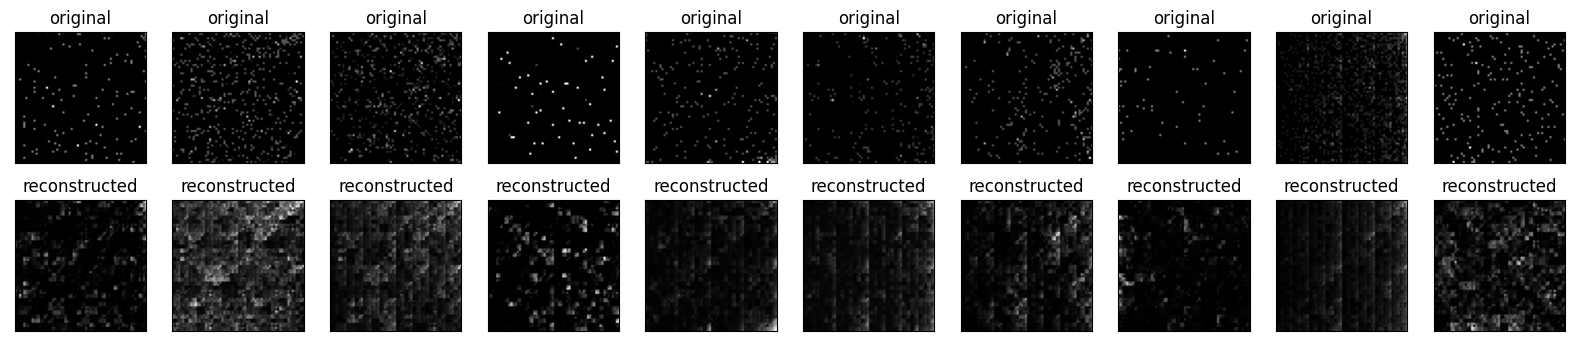

In [12]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(data[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i,:,:,0])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


In [13]:
decoded_imgs.shape

(10, 64, 64, 1)